In [56]:
from __future__ import print_function, division, absolute_import
import os,sys
import numpy as np
from scipy.linalg import inv, block_diag
import time
from joblib import Parallel, delayed
import gudhi
sys.path.insert(0, "C:\\Users\\matt\\Desktop\\orbithunter\\")
from orbithunter import *
import matplotlib.pyplot as plt
import itertools
from gudhi.hera import wasserstein_distance

In [57]:
orbit1 = read_h5('OrbitKS_L31p245_T46p754.h5')
orbit2 = read_h5('OrbitKS_L26p931_T41p266.h5')
orbit3 = read_h5('OrbitKS_L26p427_T80p246.h5')
orbit4 = read_h5('OrbitKS_L27p038_T23p329.h5')

In [58]:
sr = read_h5('ShiftReflectionOrbitKS_L34p465_T30p451.h5')

In [59]:
pcc1 = orbit_periodic_cubical_complex(orbit1)

In [60]:
def group_orbit(orbit, half=0):
    gorbit =  np.array([orbit.to_fundamental_domain(half=0),
                     orbit.reflection().to_fundamental_domain(), 
                     orbit.cell_shift(axis=1).to_fundamental_domain(),
                     orbit.cell_shift(axis=1).reflection().to_fundamental_domain()])
    return gorbit

In [61]:
def orbit_wasserstein_distance(orbit1, orbit2, **kwargs):
    persistence1 = orbit_periodic_cubical_complex(orbit1, **kwargs).persistence()
    persistence2 = orbit_periodic_cubical_complex(orbit2, **kwargs).persistence()
    wd = wasserstein_distance(*([p[-1] for p in persistence1], [p[-1] for p in persistence2]))
    return wd

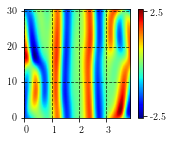

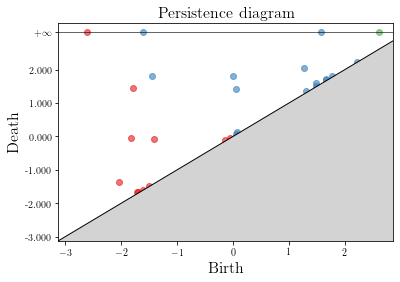

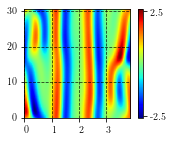

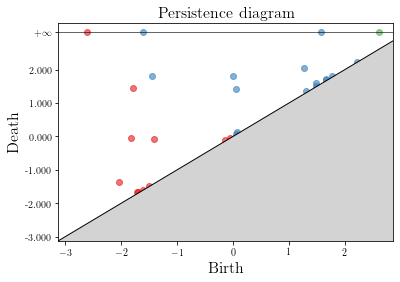

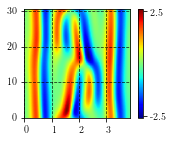

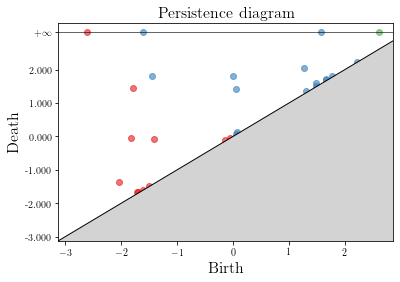

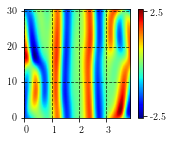

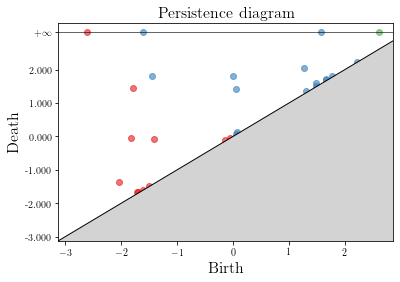

In [62]:
persistences = []
group_orbit = [sr, sr.reflection(), sr.cell_shift(axis=1), sr.cell_shift().reflection()]
for orbit in group_orbit:
    orbit.plot(fundamental_domain=False)
    pcc = orbit_periodic_cubical_complex(orbit)
    ps = pcc.persistence()
    persistences.append([p[-1] for p in ps])
    gudhi_plot(ps)

In [63]:
for g in group_orbit:
    print(orbit_wasserstein_distance(group_orbit[0], g))

0.0
1.4918621893400541e-15
1.396799342856525e-14
1.3856971126102735e-14


In [13]:
orbit2_test = rediscretize(orbit2.convert(to='field'), new_shape=(256, 256))

t0 = time.time()
pcc2, persistence2 = orbit_persistence(orbit2_test, min_persistence=2)
t2 = time.time()
print(t2-t0)

0.1948235034942627


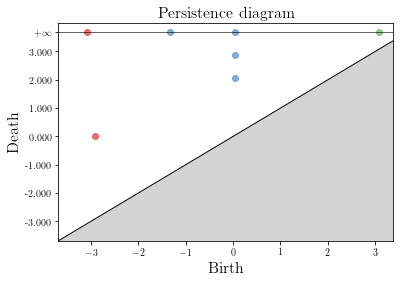

In [14]:
gudhi_plot(persistence2)

In [15]:
import gudhi

In [30]:
orbit_wasserstein_distance(orbit1.reflection(), orbit2)

18.10549357081882

In [ ]:
gudhi_plot(persistence)

In [36]:
pcc1.betti_numbers()

[1, 2, 1]

In [45]:
pcc1.persistence_intervals_in_dimension(0)

array([[-1.62777425, -0.03856348],
       [-2.49168054, -0.02310981],
       [-2.65267656,  1.17265552],
       [-2.67814985,         inf]])

In [47]:
persistence1

[(2, (2.9693800404421204, inf)),
 (1, (-1.2892362514860092, inf)),
 (1, (1.3854279588045713, inf)),
 (1, (-1.1242346157783674, 2.3825103185654792)),
 (1, (-0.2495511490364533, 2.786823358646274)),
 (1, (0.1005614101378783, 2.07288729277307)),
 (0, (-2.678149853088561, inf)),
 (0, (-2.652676558195266, 1.172655520885356)),
 (0, (-2.4916805447128167, -0.023109809499019633)),
 (0, (-1.6277742464754517, -0.03856347751086778))]

In [ ]:
t0 = time.time()
orbit_persistence_test = rediscretize(orbit1, new_shape=(1024, 1024))
pcc, persistence = orbit_persistence(orbit_persistence_test)
gudhi_plot(persistence)
t1 = time.time()
print(t1-t0)

pcc.persistent_betti_numbers()

type(pcc)

import gudhi

type(persistence)

orbit_persistence_test = rediscretize(orbit1, new_shape=(1024, 1024))
orbit_persistence_test2 = rediscretize(orbit2, new_shape=(1024, 1024))

pcc, persistence = orbit_persistence(orbit_persistence_test)
pcc2, persistence2 = orbit_persistence(orbit_persistence_test2)

In [19]:
gudhi.hera.wasserstein_distance()

?gudhi_plot



AttributeError: module 'gudhi' has no attribute 'hera'